In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import random

In [129]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.gridspec import GridSpec
from collections import defaultdict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import LinearSVC
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut, LeaveOneOut, KFold
from sklearn.metrics import accuracy_score

In [130]:
# plot/colors definitions
cpath = '/n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana'
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

sns.set_style('white')

In [131]:
## for males

In [132]:
## upload data frame females
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_all.parquet')
mdf_all = pd.read_parquet(path)
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_most_used.parquet')
mdf = pd.read_parquet(path)

In [133]:
# remove bad datapoint
bad_sessions = [376]
#bad_sessions = [285, 354]
#bad_session=[221, 228]
#bad_syllable=[44,89]
bad_syllable=[44]
#bad_mouse='04_01'
#temp = mdf.loc[~mdf.index.isin(list(bad))]
mdf.drop(bad_sessions, level=0, axis=0, inplace=True)
#newdf.drop(bad_mouse, level=1, axis=0, inplace=True)
mdf.drop(bad_syllable, axis=1, inplace=True)

In [134]:
## decoder

In [135]:
# choose a model
#clf = svm.SVC(kernel='linear') 
#clf = RandomForestClassifier(n_estimators = 250)
clf = LinearRegression()

# choose cross validation scheme
#cv = LeaveOneOut()
#cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cv=5

#number of iterations for shuffle
it=100

In [136]:
#for males
ymale = mdf.index.get_level_values(0).to_numpy()
Xmale= mdf.to_numpy()
Xmale = np.log(Xmale + 1e-6) # convert to linear

In [137]:
#for males
y_pred = cross_val_predict(clf, Xmale, ymale, cv=cv)

In [138]:
#predicted age vs actual age for each mouse
df=pd.DataFrame()
df['pred'] = y_pred
df['actual'] = ymale
df['mouse'] = mdf.index.get_level_values(1).to_numpy()

In [139]:
# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


Text(0.5, 1.0, 'mouse age vs predicted age over days')

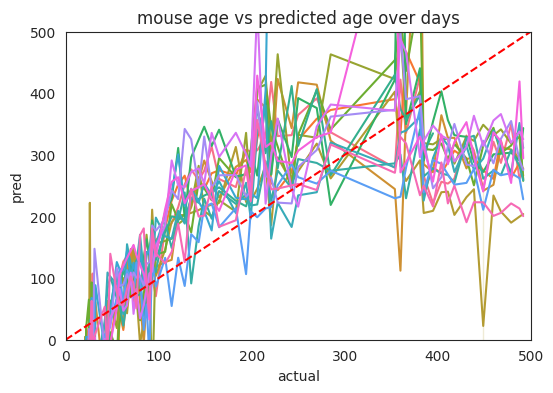

In [140]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual", y="pred", hue="mouse",legend=False, ax=ax)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 500)
plt.xlim(0, 500)
plt.title('mouse age vs predicted age over days')

Text(0.5, 1.0, 'mouse age vs predicted age over days')

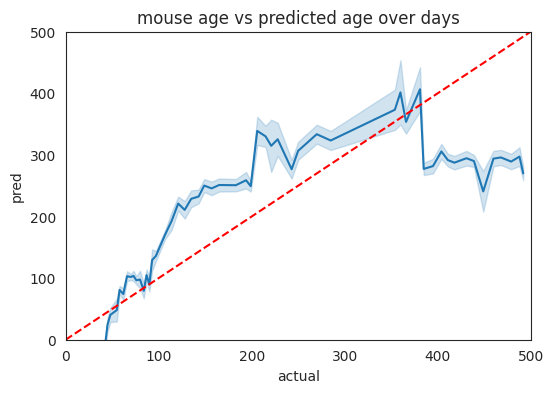

In [141]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual", y="pred", estimator='mean', errorbar= 'se')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 500)
plt.xlim(0, 500)
plt.title('mouse age vs predicted age over days')

In [142]:
##  ad bin by week, by month

In [143]:
# get weeks for longtogeny
days =df['actual'].to_numpy()
df['actual_wks'] = np.floor(days/7).astype(int)
df['actual_months'] = np.ceil(days/30).astype(int)
days =df['pred'].to_numpy()
df['pred_wks'] = np.floor(days/7).astype(int)
df['pred_months'] = np.ceil(days/30).astype(int)
# get mean syllable usage per age in weeks

Text(0.5, 1.0, 'mouse age vs predicted age over weeks')

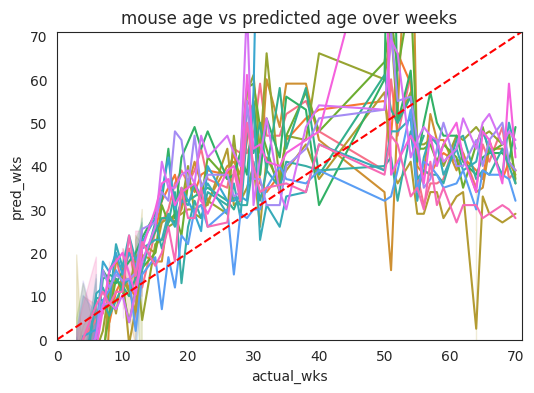

In [144]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual_wks", y="pred_wks", hue="mouse",legend=False)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 71)
plt.xlim(0, 71)
plt.title('mouse age vs predicted age over weeks')

Text(0.5, 1.0, 'mouse age vs predicted age over wks')

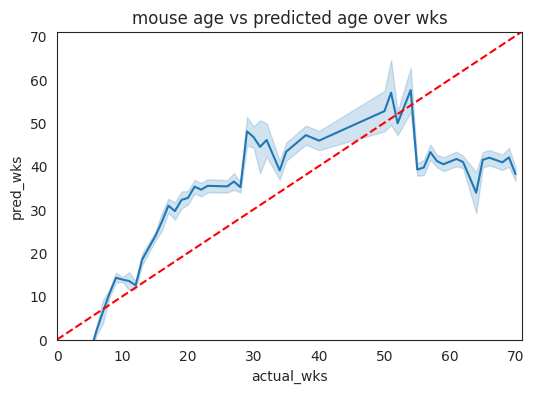

In [145]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual_wks", y="pred_wks", estimator='mean', errorbar= 'se')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 71)
plt.xlim(0, 71)
plt.title('mouse age vs predicted age over wks')

Text(0.5, 1.0, 'mouse age vs predicted age over months')

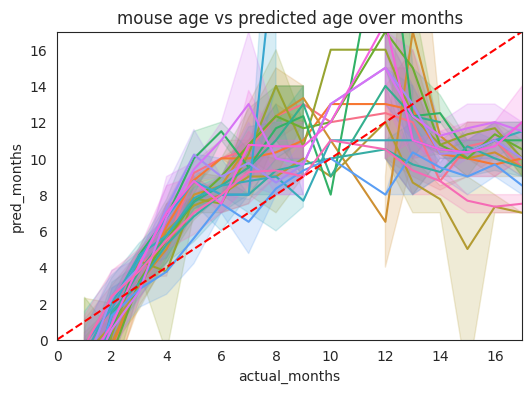

In [146]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual_months", y="pred_months", hue="mouse",legend=False)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 17)
plt.xlim(0, 17)
plt.title('mouse age vs predicted age over months')

Text(0.5, 1.0, 'mouse age vs predicted age over months')

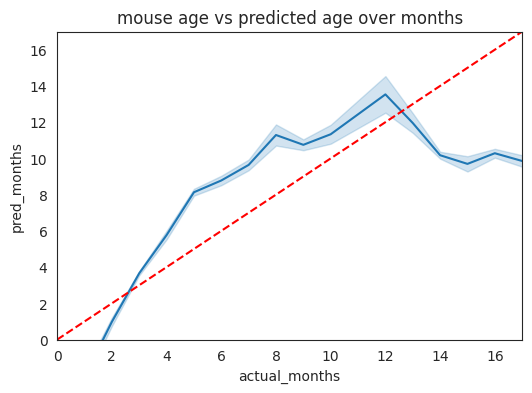

In [147]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual_months", y="pred_months", estimator='mean', errorbar= 'se')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 17)
plt.xlim(0, 17)
plt.title('mouse age vs predicted age over months')

In [148]:
## same but with averaging the data across wks or months

In [149]:
# for wks

In [150]:
days =mdf.index.get_level_values(0).to_numpy()
wks = np.floor(days/7).astype(int)
df_wks = mdf.copy()
df_wks['wks'] = wks
df_wks = df_wks.groupby(['wks','mouse']).mean()

In [151]:
ymale = df_wks.index.get_level_values(0).to_numpy()
Xmale= df_wks.to_numpy()
Xmale = np.log(Xmale + 1e-6) # convert to linear

In [152]:
y_pred = cross_val_predict(clf, Xmale, ymale, cv=cv)
#predicted age vs actual age for each mouse
df=pd.DataFrame()
df['pred'] = y_pred
df['actual'] = ymale
df['mouse'] = df_wks.index.get_level_values(1).to_numpy()

Text(0.5, 1.0, 'mouse age vs predicted age over weeks with averaging per week/per mouse')

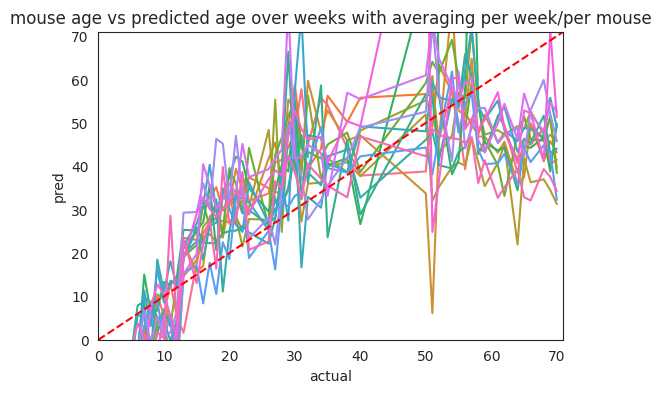

In [153]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual", y="pred", hue="mouse",legend=False, ax=ax)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 71)
plt.xlim(0, 71)
plt.title('mouse age vs predicted age over weeks with averaging per week/per mouse')

Text(0.5, 1.0, 'mouse age vs predicted age over weeks with averaging per week/per mouse')

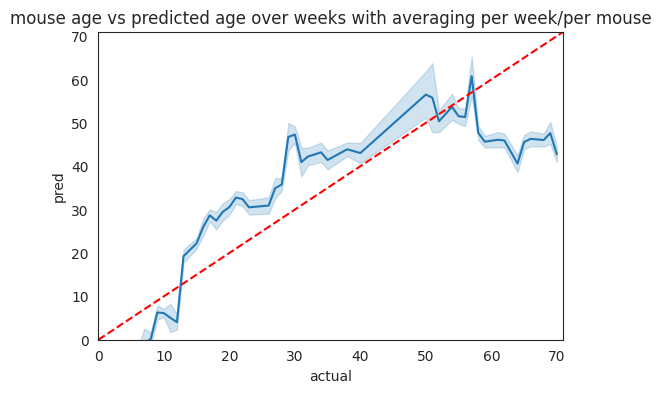

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual", y="pred", estimator='mean', errorbar= 'se')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 71)
plt.xlim(0, 71)
plt.title('mouse age vs predicted age over weeks with averaging per week/per mouse')

In [155]:
## for months

In [156]:
days =mdf.index.get_level_values(0).to_numpy()
months = np.ceil(days/30).astype(int)
df_months = mdf.copy()
df_months['months'] = months
df_months = df_months.groupby(['months','mouse']).mean()

In [157]:
ymale = df_months.index.get_level_values(0).to_numpy()
Xmale= df_months.to_numpy()
Xmale = np.log(Xmale + 1e-6) # convert to linear

In [158]:
y_pred = cross_val_predict(clf, Xmale, ymale, cv=cv)
#predicted age vs actual age for each mouse
df=pd.DataFrame()
df['pred'] = y_pred
df['actual'] = ymale
df['mouse'] = df_months.index.get_level_values(1).to_numpy()

Text(0.5, 1.0, 'mouse age vs predicted age over months with averaging per month/per mouse')

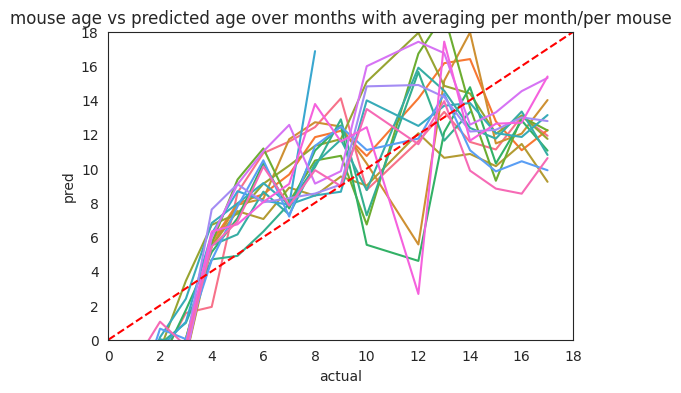

In [159]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual", y="pred", hue="mouse",legend=False, ax=ax)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 18)
plt.xlim(0, 18)
plt.title('mouse age vs predicted age over months with averaging per month/per mouse')

Text(0.5, 1.0, 'mouse age vs predicted age over months with averaging per month/per mouse')

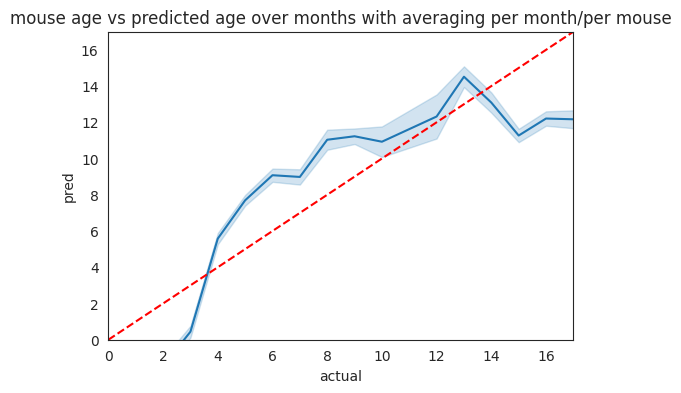

In [160]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
sns.lineplot(data=df, x="actual", y="pred", estimator='mean', errorbar= 'se')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', c='r')
plt.ylim(0, 17)
plt.xlim(0, 17)
plt.title('mouse age vs predicted age over months with averaging per month/per mouse')